In [100]:
#Import necessary libraries

#for data analysis
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#data for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


Defaulting to user installation because normal site-packages is not writeable


In [29]:
#Load dataset
df = pd.read_csv(r"C:\Users\adewu\Downloads\10NALYTICS\ASSIGNMENT\Capstone\diabetes_prediction_dataset.csv")

## Data Understanding

In [30]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [31]:
#Data verification - data type, number of features and rows, missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [32]:
#statistical analysis of data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


- the analysis of the:
- age shows, mean ~ median apprx normal dist., and the difference btw the median and mean is apprx less than 5% of the mean. There is no extreme outliers.
- hypertension shows, mean ~ median apprx normal dist., no extreme outliers 
- heart_disease shows, mean ~ median apprx normal dist., no extreme outliers 
- bmi shows, mean ~ median, normal dist., no  outliers 
- HbA1c_level shows, mean < median, mildly skewed, possible extreme outliers 
- blood_glucose_level shows, mean < median apprx normal dist., no extreme outliers 
- diabetes shows, mean ~ median apprx normal dist., no extreme outliers 

# Exploratory Data Analysis

## Data Cleaning

In [33]:
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


<AxesSubplot:>

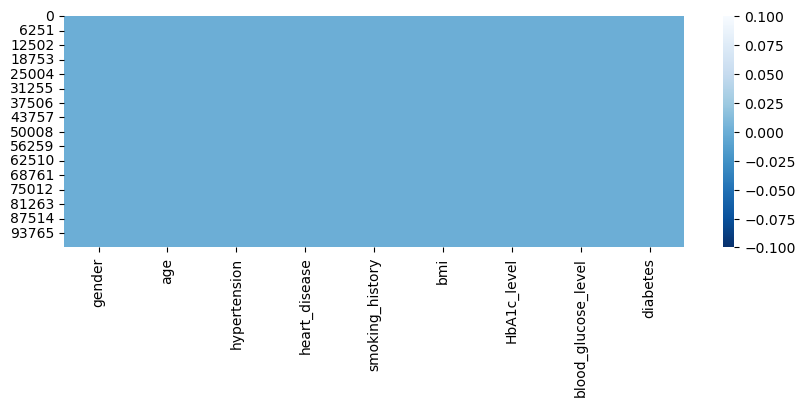

In [34]:
#checking for missing values
print(df.isnull().sum())

#visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

- no missing data in the columns

In [35]:
#Check for duplicate data
df.duplicated().sum()

3888

In [36]:
#view the duplicated data
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80,0,0,No Info,27.32,6.6,159,0
3272,Female,80,0,0,No Info,27.32,3.5,80,0
3418,Female,19,0,0,No Info,27.32,6.5,100,0
3939,Female,78,1,0,former,27.32,3.5,130,0
3960,Male,47,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52,0,0,never,27.32,6.1,145,0
99985,Male,25,0,0,No Info,27.32,5.8,145,0
99989,Female,26,0,0,No Info,27.32,5.0,158,0
99990,Male,39,0,0,No Info,27.32,6.1,100,0


In [37]:
#drop duplicate data
df.drop_duplicates(inplace=True)

In [38]:
#confirm to see if duolicates are dropped.
df.duplicated().sum()

0

In [39]:
#Check for irrelevant columns
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0


In [40]:
df.drop("gender", axis=1, inplace=True)
df.head(2)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,never,25.19,6.6,140,0
1,54,0,0,No Info,27.32,6.6,80,0


In [41]:
#put all numerical column into a dataframe
numerical_data = df.select_dtypes(include="number")
numerical_data.head(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0


In [42]:
numerical_columns = numerical_data.columns
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [43]:
categorical_data = df.select_dtypes(include="object")
categorical_columns = categorical_data.columns
categorical_columns

Index(['smoking_history'], dtype='object')

### Univariate Analysis

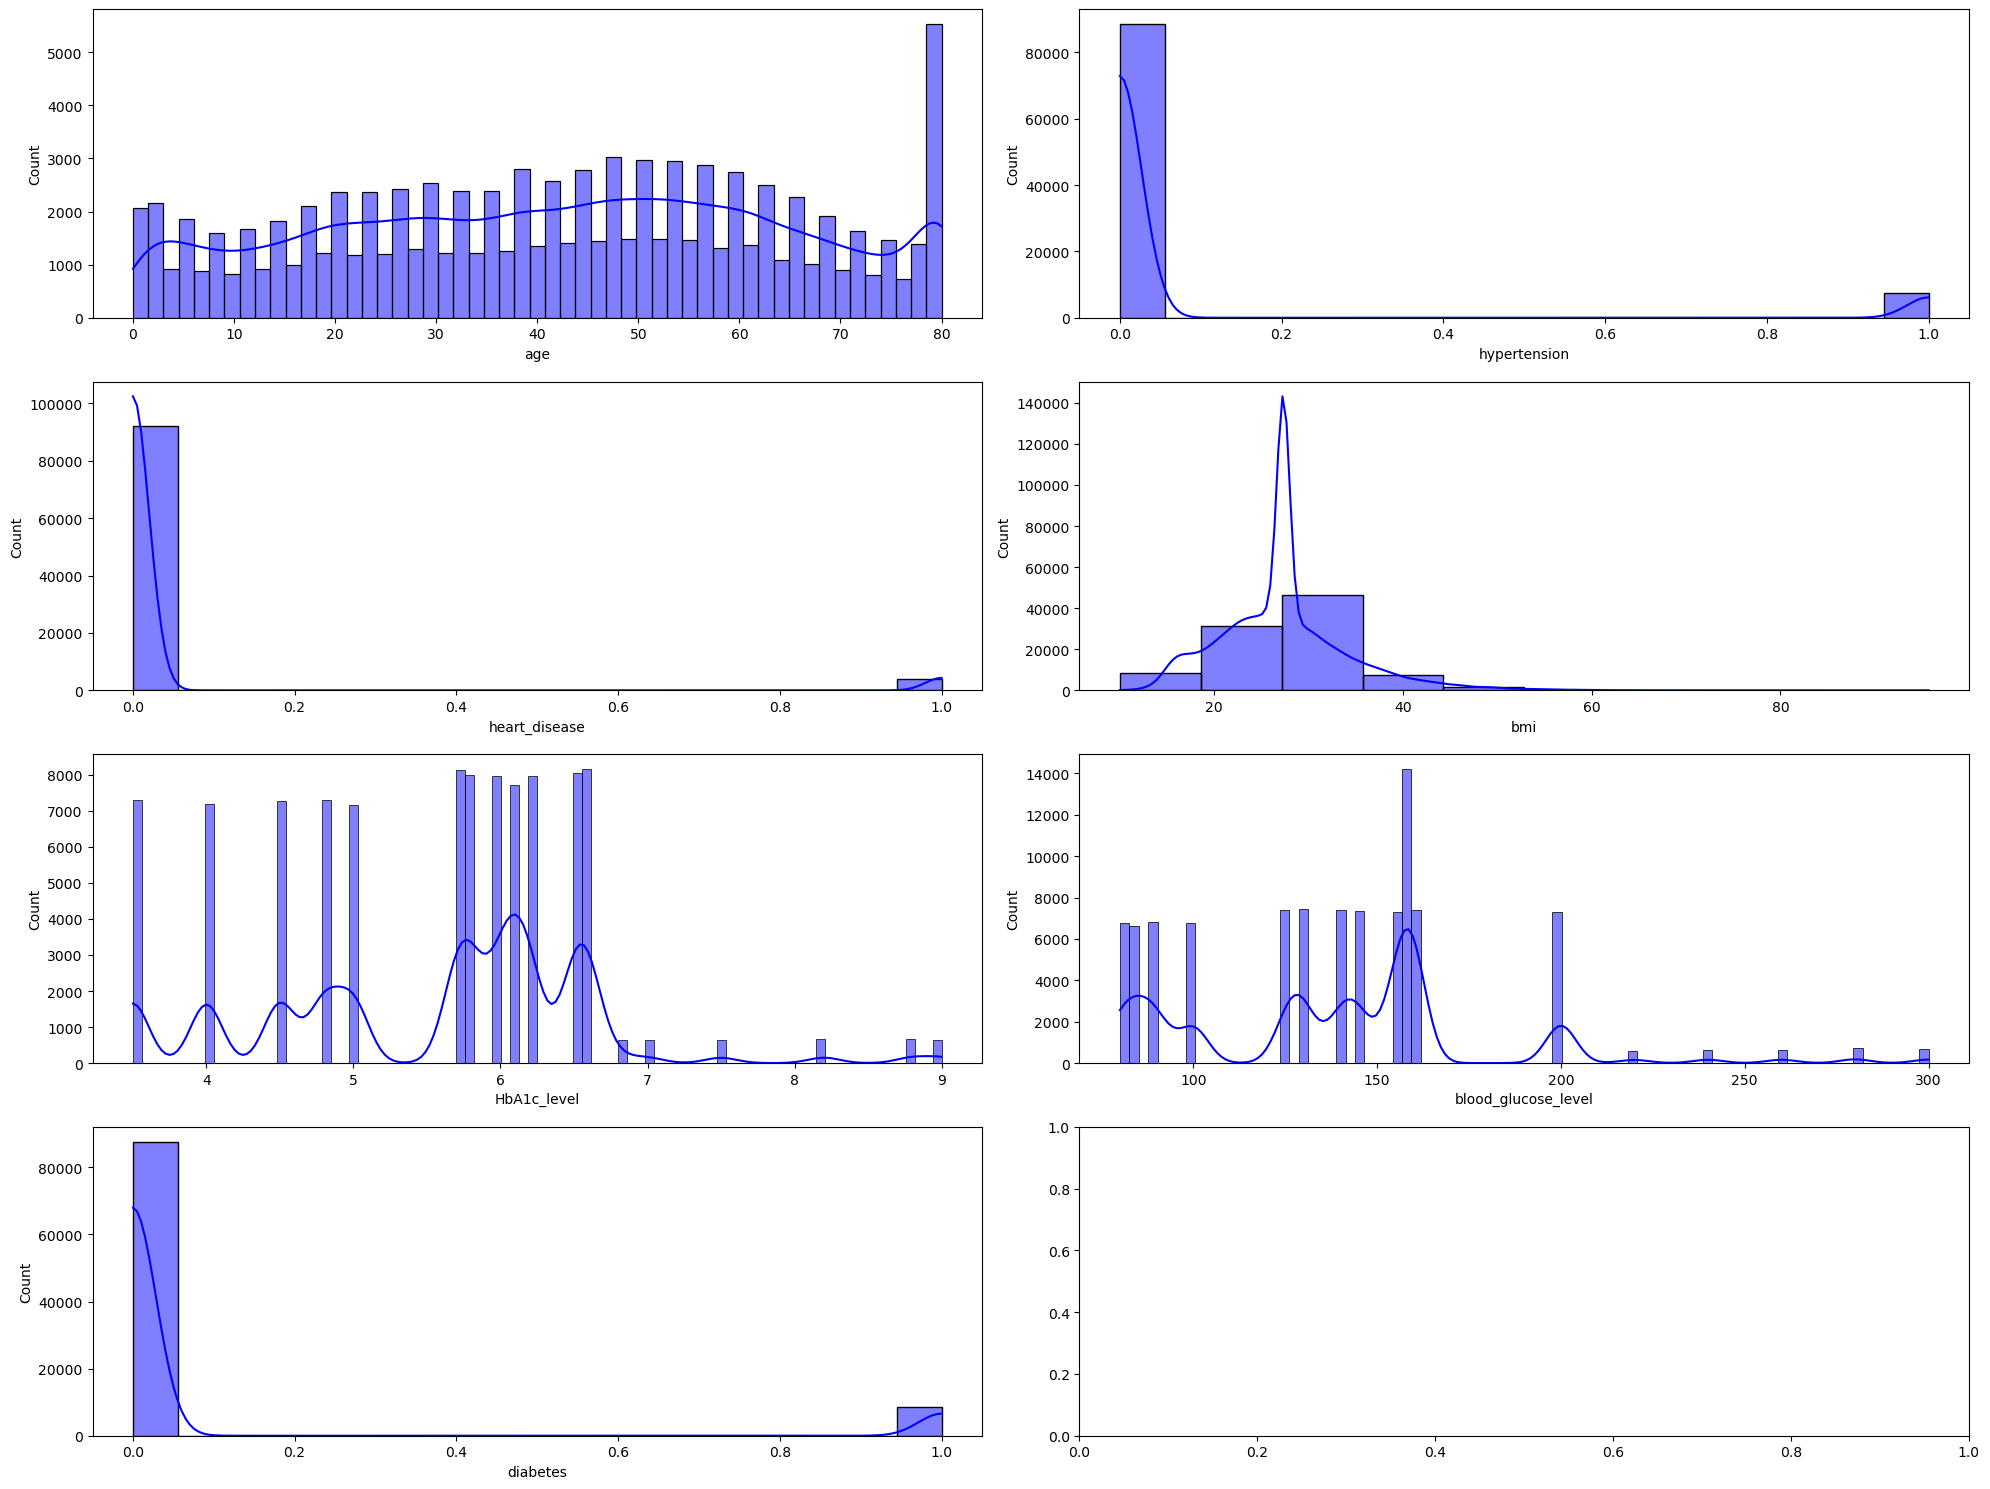

In [44]:
#subplots to show a visuaization of all columns  
fig, position = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
sns.histplot(df["age"], color="blue", kde=True, ax=position[0,0])
sns.histplot(df["hypertension"], color="blue", kde=True, ax=position[0,1])
sns.histplot(df["heart_disease"], color="blue", kde=True, ax=position[1,0])
sns.histplot(df["bmi"], color="blue", bins=10, kde=True, ax=position[1,1])
sns.histplot(df["HbA1c_level"], color="blue", kde=True, ax=position[2,0])
sns.histplot(df["blood_glucose_level"], color="blue", kde=True, ax=position[2,1])
sns.histplot(df["diabetes"], color="blue", kde=True, ax=position[3,0])

plt.tight_layout()
plt.show()

- the histogram shows the highest age is around 80 years.
- less than 20000 people have hypertension, more than 80000 doesnt have hypertension. The distribution of hypertension is a right skewed distribution. 
-  The distribution of heart_disease is a right skewed distribution. More people do not have heart disease. Minority of the people have heart disease.
- 'bmi' has a normal distribution. 
- the target variable 'diabetes' has a right skewed distribution. More people do not have diebetes.

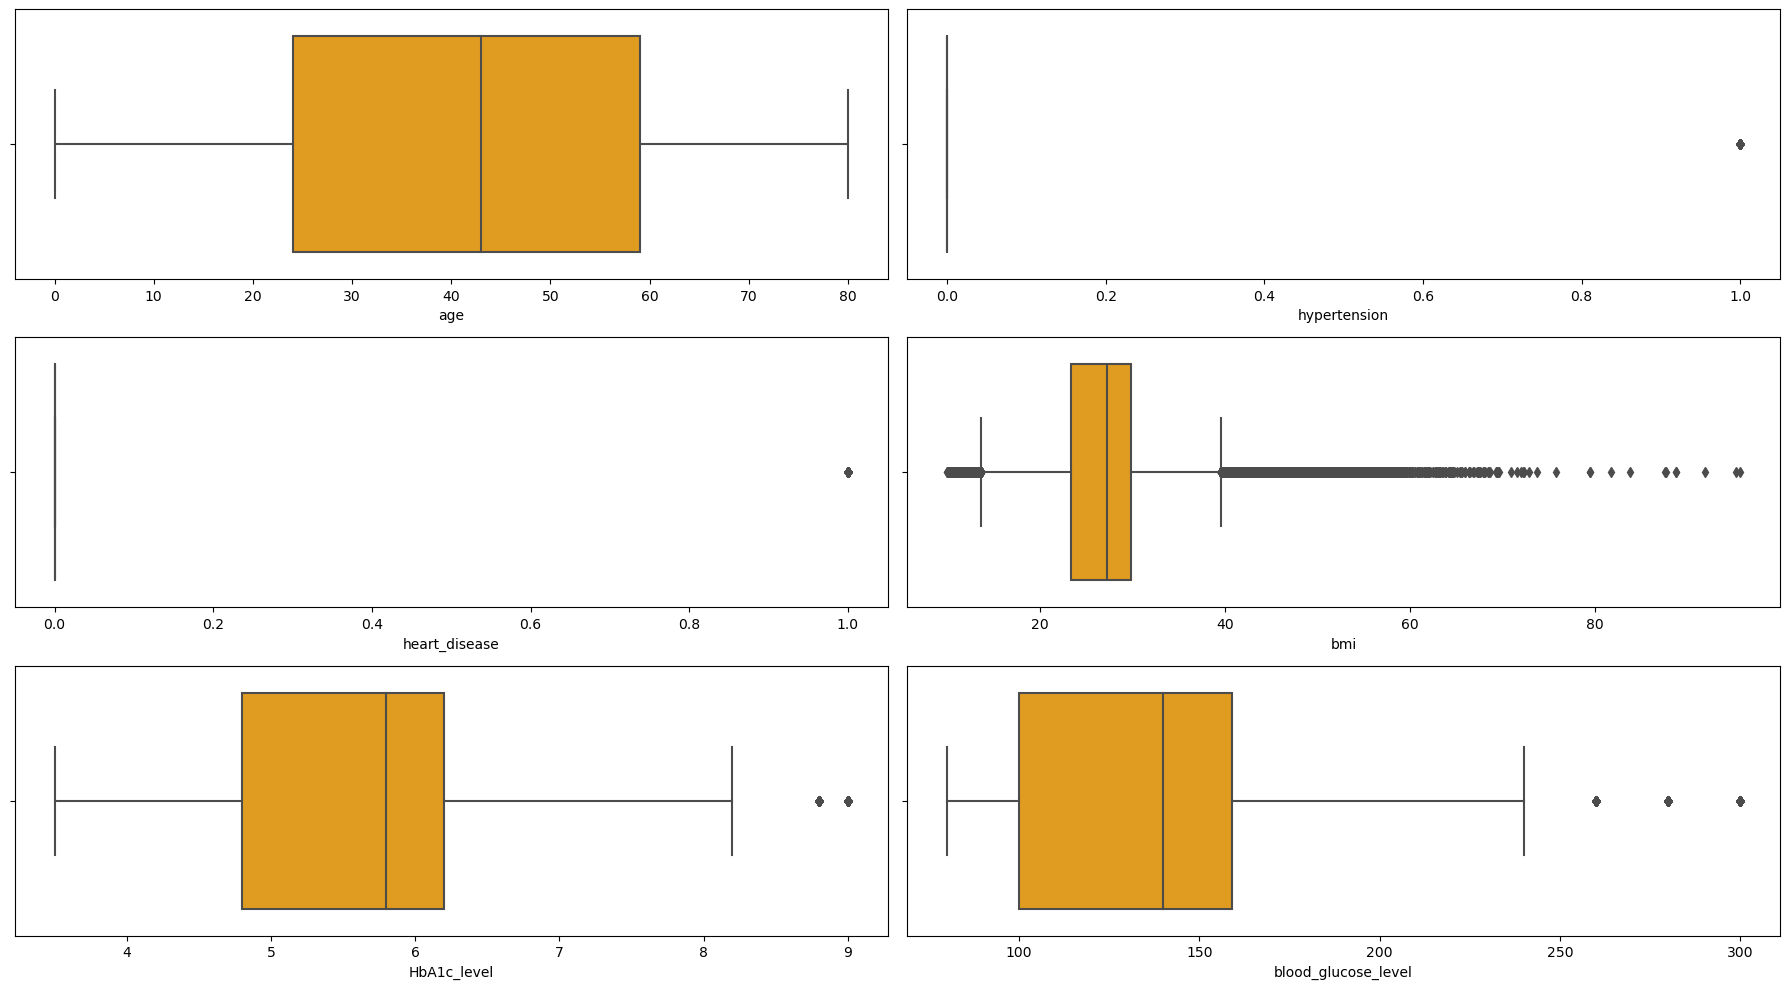

In [45]:
#Handling Outliers
#boxplots to visualize the data in columns and outliers 
fig, position = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
sns.boxplot(x =df["age"], color="orange", ax=position[0,0])
sns.boxplot(x =df["hypertension"], color="orange", ax=position[0,1])
sns.boxplot(x =df["heart_disease"], color="orange", ax=position[1,0])
sns.boxplot(x =df["bmi"], color="orange", ax=position[1,1])
sns.boxplot(x =df["HbA1c_level"], color="orange", ax=position[2,0])
sns.boxplot(x =df["blood_glucose_level"], color="orange", ax=position[2,1])

plt.tight_layout()
plt.show()

- bmi, HbA1c_lavel, blood_glucose_level have outliers.
- heart_disease and hypertension are categorised (0,1), hence the visualization is blank.

In [46]:
#IQR to handle the outliers
q1 = df[["bmi", "HbA1c_level", "blood_glucose_level"]].quantile(0.25)
q3 = df[["bmi", "HbA1c_level", "blood_glucose_level"]].quantile(0.75)
iqr = q3-q1
iqr

bmi                     6.46
HbA1c_level             1.40
blood_glucose_level    59.00
dtype: float64

In [47]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [48]:
lower_bound

bmi                    13.71
HbA1c_level             2.70
blood_glucose_level    11.50
dtype: float64

In [49]:
upper_bound

bmi                     39.55
HbA1c_level              8.30
blood_glucose_level    247.50
dtype: float64

- any value below the lower bound will be considered a low outlier
- any value above the  bound will be considered a high outlier


In [50]:
#Identity the outliers,
#any(axis=1)any row with at least one outlier on the 3 columns, makes that row is an outlier
outliers = ((df[["bmi", "HbA1c_level", "blood_glucose_level"]] < lower_bound) | (df[["bmi", "HbA1c_level", "blood_glucose_level"]] > upper_bound)).any(axis=1)

In [51]:
outliers.sum()

7951

In [52]:
#display of where outliers exist
df[outliers]

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
11,54,0,0,former,54.70,6.0,100,0
38,50,1,0,current,27.32,5.7,260,1
39,34,0,0,never,56.43,6.2,200,0
40,73,0,0,former,25.91,9.0,160,1
55,50,0,0,former,37.16,9.0,159,1
...,...,...,...,...,...,...,...,...
99948,56,1,0,former,39.62,4.5,126,0
99953,59,1,0,ever,60.52,3.5,158,0
99957,61,0,0,No Info,34.45,6.5,280,1
99960,47,0,0,former,45.15,4.0,126,0


In [53]:
#dataframe without outliers
df = df[~outliers]

In [54]:
df.shape

(88161, 8)

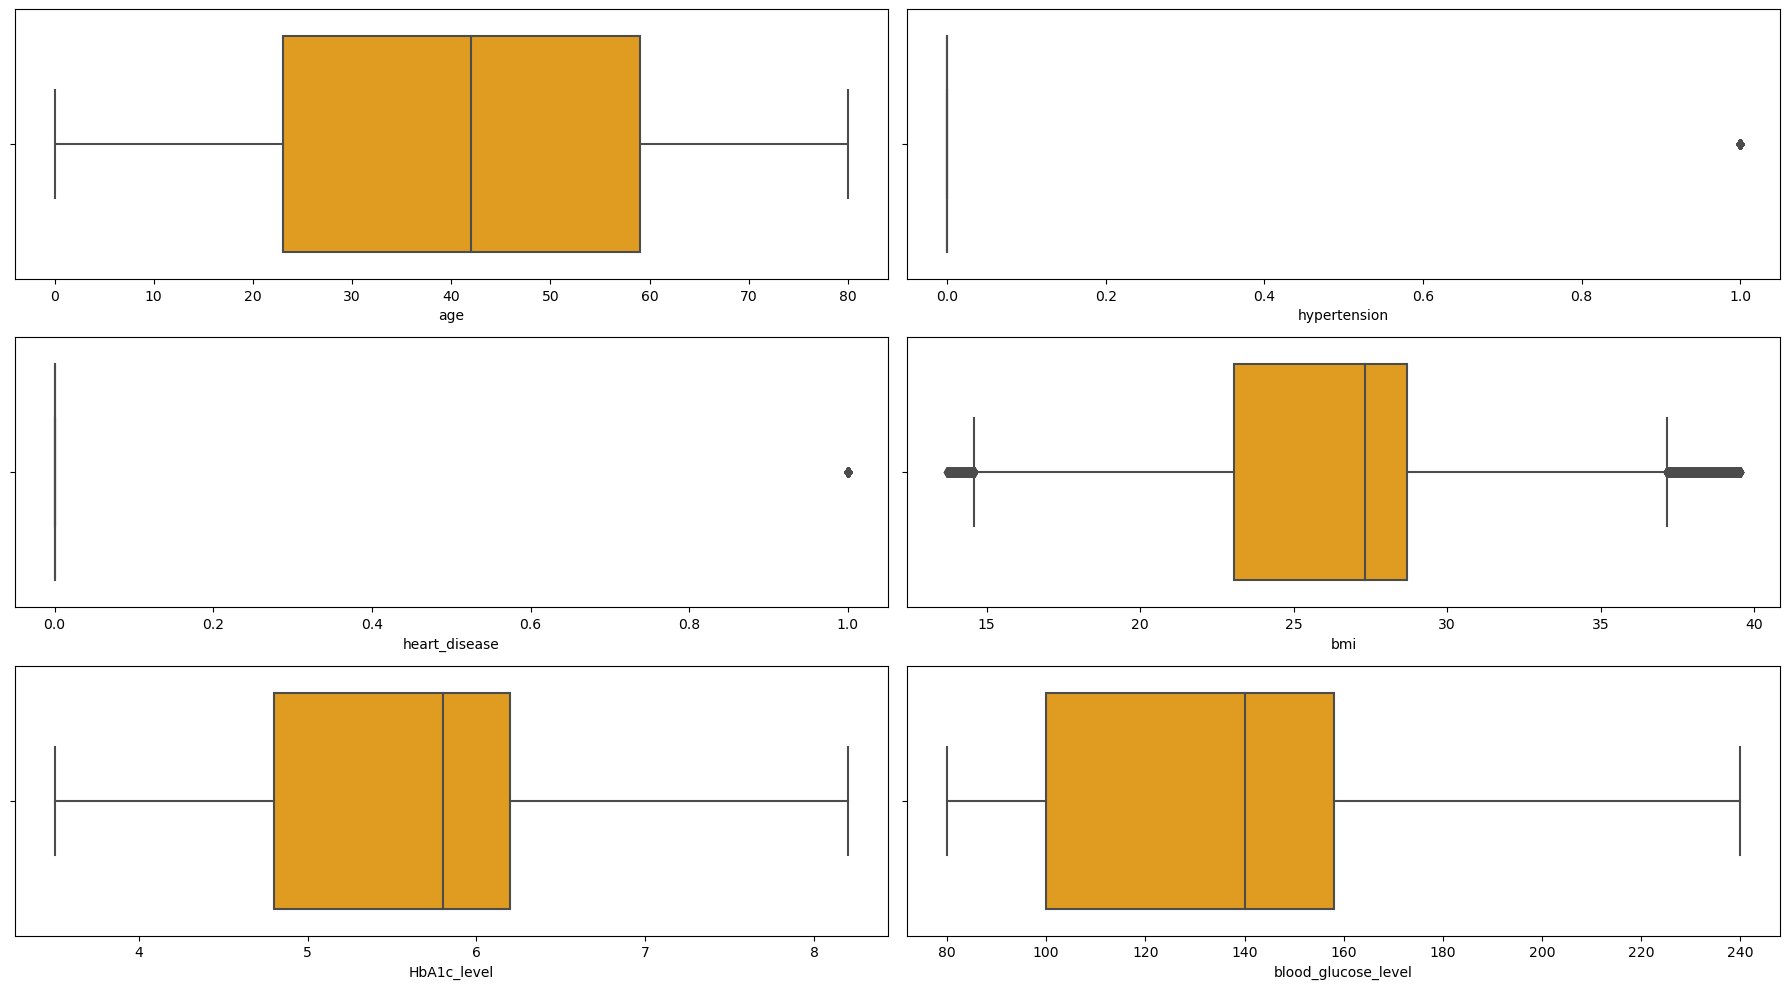

In [55]:
#Check the features to confirm there are no more outliers
fig, position = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
sns.boxplot(x =df["age"], color="orange", ax=position[0,0])
sns.boxplot(x =df["hypertension"], color="orange", ax=position[0,1])
sns.boxplot(x =df["heart_disease"], color="orange", ax=position[1,0])
sns.boxplot(x =df["bmi"], color="orange", ax=position[1,1])
sns.boxplot(x =df["HbA1c_level"], color="orange", ax=position[2,0])
sns.boxplot(x =df["blood_glucose_level"], color="orange", ax=position[2,1])

plt.tight_layout()
plt.show()

In [56]:
#hypertension label
def hyper_cat(hyp):
    if hyp == 1:
        return "Yes"
    else:
        return "No"

df['hypertension_cat'] = df['hypertension'].apply(hyper_cat)

In [57]:
#heart_disease label
def label1(hd):
    if hd == 1:
        return "Yes"
    else:
        return "No"

df['hd_label'] = df['heart_disease'].apply(label1)

#Target-diabetes label
def label2(dia):
    if dia == 1:
        return "Yes"
    else:
        return "No"

df['diab_label'] = df['diabetes'].apply(label2)

Text(0.5, 1.0, 'Total Number of Patients')

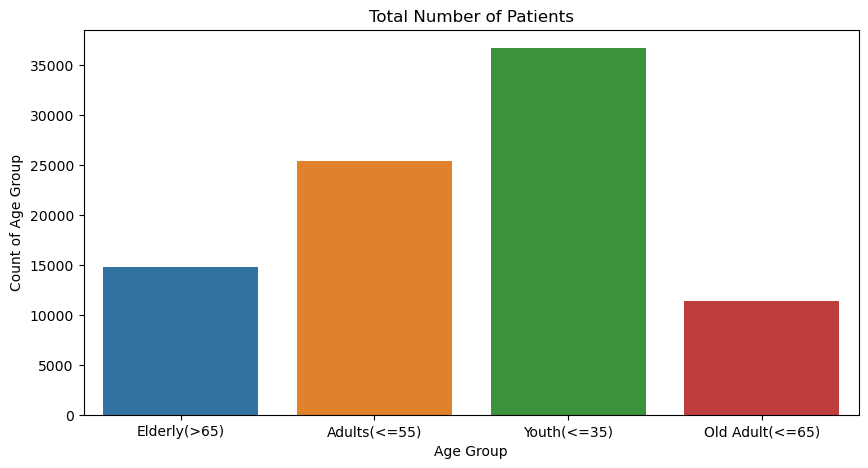

In [58]:
#Data Visualization
#Age Bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adults(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

df['age_bracket'] = df['age'].apply(age_bracket)

#Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

- there is more youth than adult, old adult and elderly

In [59]:
df.head(1)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension_cat,hd_label,diab_label,age_bracket
0,80,0,1,never,25.19,6.6,140,0,No,Yes,No,Elderly(>65)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88161 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  88161 non-null  int32  
 1   hypertension         88161 non-null  int64  
 2   heart_disease        88161 non-null  int64  
 3   smoking_history      88161 non-null  object 
 4   bmi                  88161 non-null  float64
 5   HbA1c_level          88161 non-null  float64
 6   blood_glucose_level  88161 non-null  int64  
 7   diabetes             88161 non-null  int64  
 8   hypertension_cat     88161 non-null  object 
 9   hd_label             88161 non-null  object 
 10  diab_label           88161 non-null  object 
 11  age_bracket          88161 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 8.4+ MB


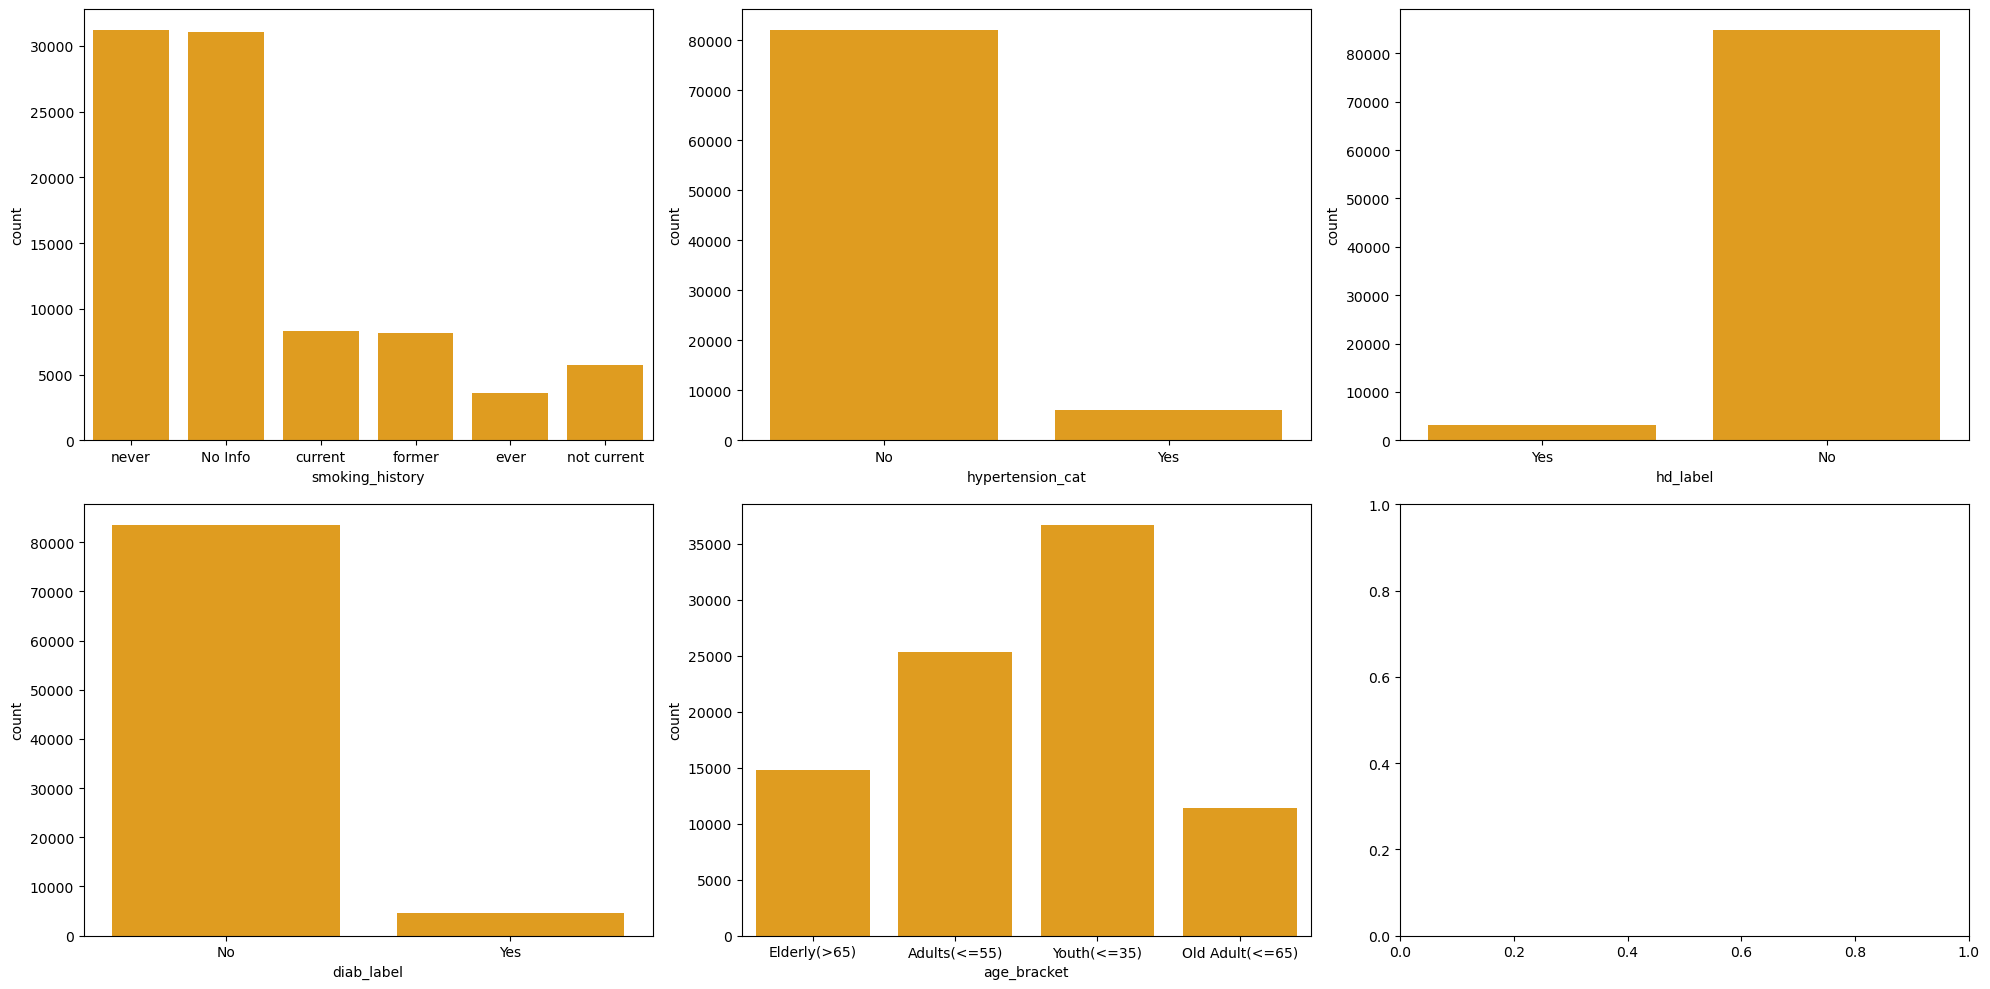

In [61]:
###Categorical colums
categorical_data = df.select_dtypes(include="object")
cat_column = categorical_data.columns

fig, position = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
position = position.flatten()

for index, column_name in enumerate(cat_column):
    sns.countplot(x=df[column_name], color="orange", ax=position[index])

plt.tight_layout()
plt.show()

- Smoking history shows, (never, no info) have the highest count, that is, more persons have never smoked and also, have nt recorded any smoking history. 
- more people are without hypertension, than the individuals with hypertension
- more people are with diabetes

### Bivariate Analysis
#### Numerical vs Numerical

In [62]:
numerical_data.head(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0


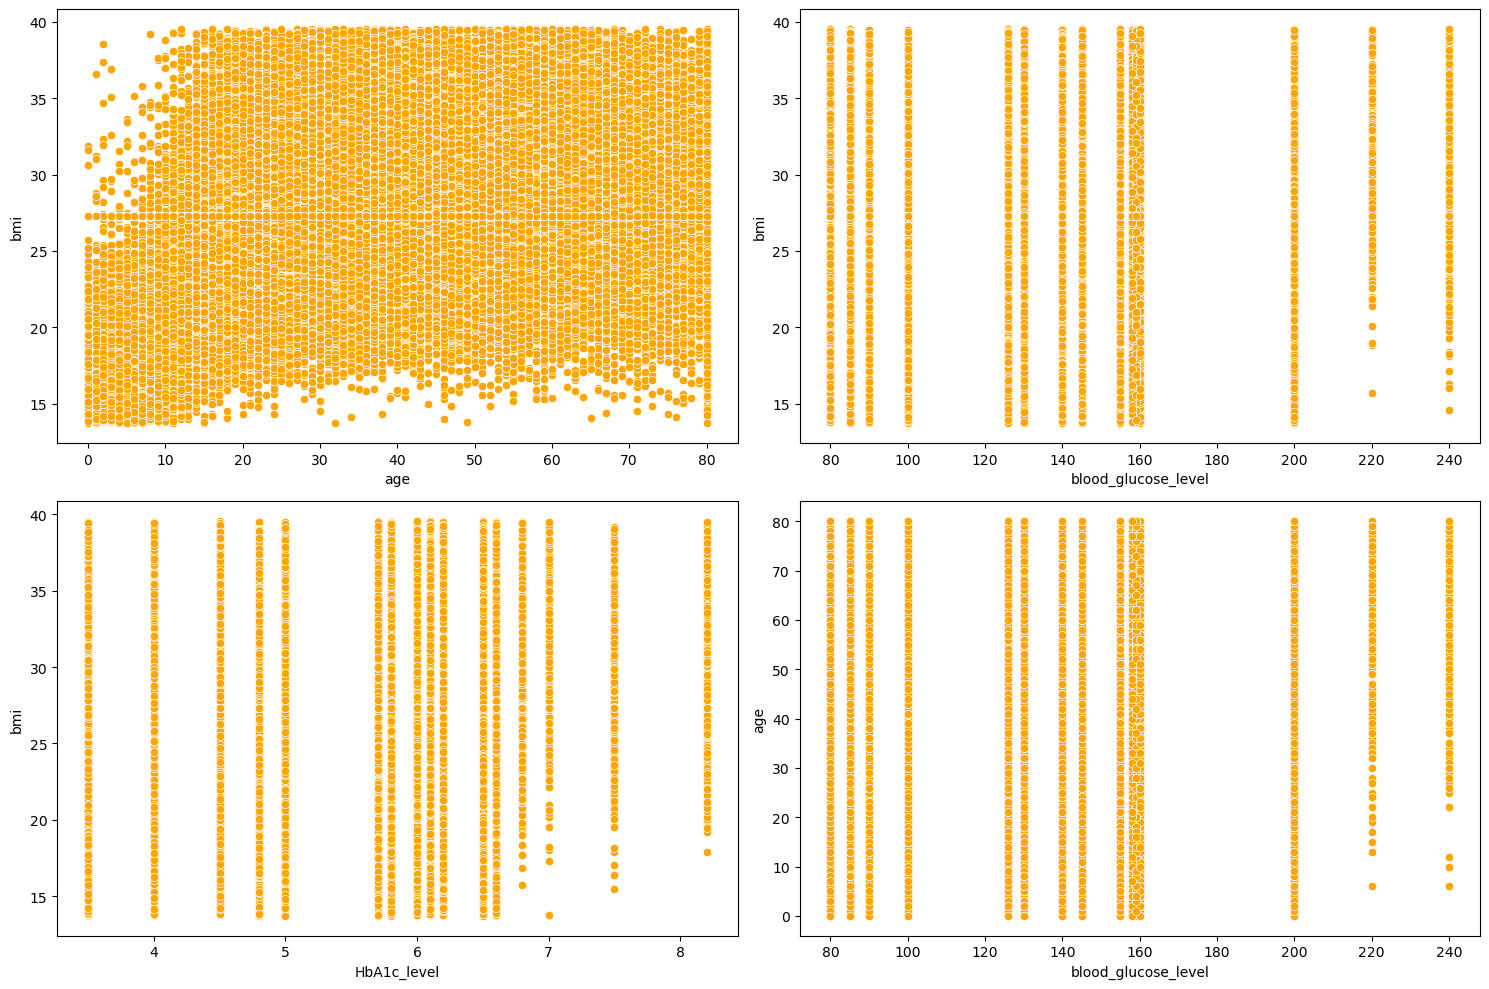

In [63]:
#Data Visualization with scatterplot
fig, position = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.scatterplot(x=df["age"], y=df["bmi"], color="orange", ax=position[0,0])
sns.scatterplot(x=df["blood_glucose_level"], y=df["bmi"], color="orange", ax=position[0,1])
sns.scatterplot(x=df["HbA1c_level"], y=df["bmi"], color="orange", ax=position[1,0])
sns.scatterplot(x=df["blood_glucose_level"], y=df["age"], color="orange", ax=position[1,1])

plt.tight_layout()
plt.show()

- the top left plot of the age and bmi shows a dense clustering that many patients have similar bmi values. No clear trend between the age and bmi and is evenly distributed across age, I think it is not a strong predictor for 

#### Numerical vs Categorical

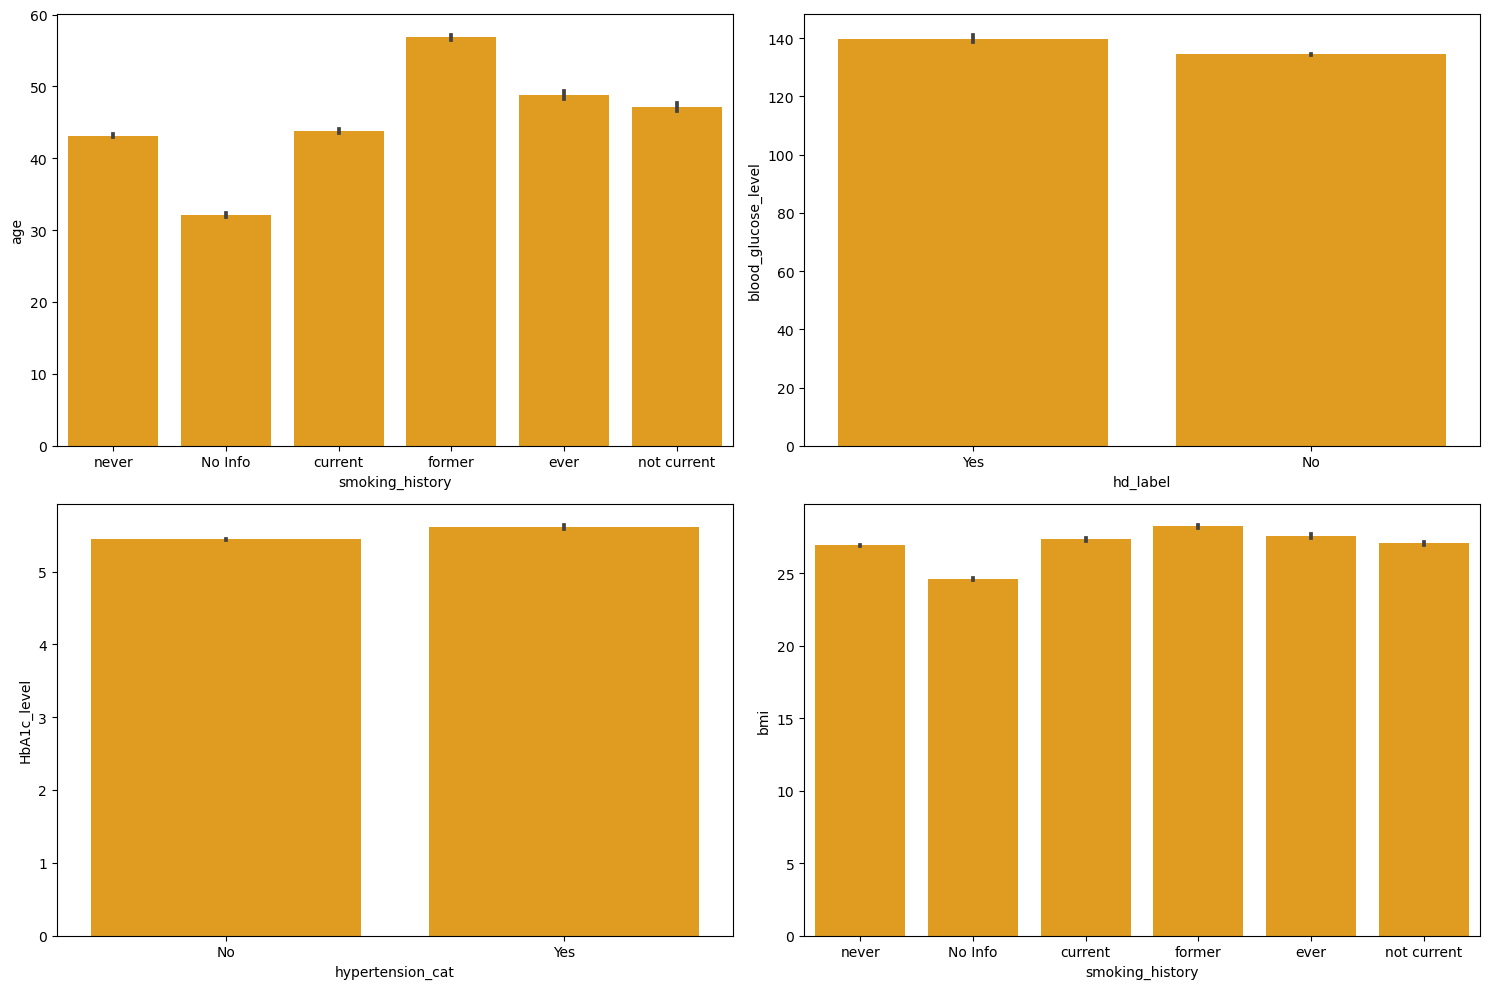

In [64]:
#data visualizationbarplot
fig, position = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.barplot(y=df["age"], x=df["smoking_history"], color="orange", ax=position[0,0])
sns.barplot(y=df["blood_glucose_level"], x=df["hd_label"], color="orange", ax=position[0,1])
sns.barplot(y=df["HbA1c_level"], x=df["hypertension_cat"], color="orange", ax=position[1,0])
sns.barplot(y=df["bmi"], x=df["smoking_history"], color="orange", ax=position[1,1])

plt.tight_layout()
plt.show()

- on the top left, ages before 60 were former smokers. Those in their early 40s are never smokers. younger ones between their 20s and 30s shows that they have no smoking history or there might be some missing data in ther information on smoking.
- on the top right, blood glucose level up to or almost 140 (higher glucose level), has heart disease.
- on the below right, Hemoglobin A1C level around 5.4, has no hypertension, and those with above 5 and above have hypertension and also at risk to have hypertension.
- on the below left, the analysis shows those with smoking history-No info, have a healthy weight range. Former smokers are more of overweight or obese, because they have bmi that ranges between 25 and 30.

#### Categorical vs Categorical

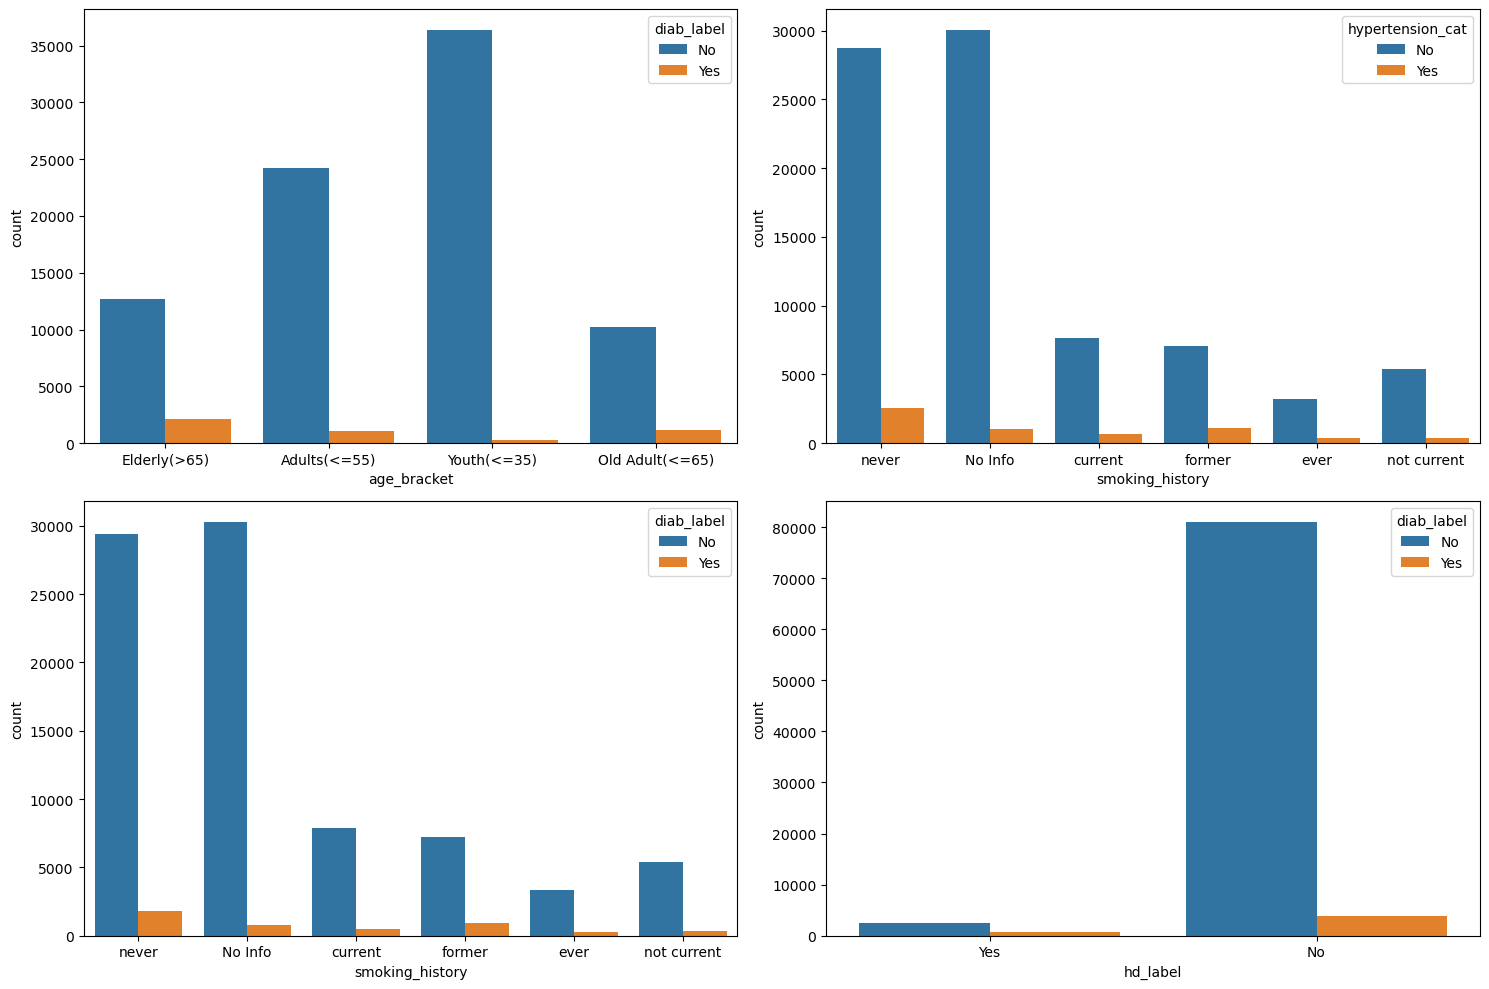

In [65]:
#countplotplot
fig, position = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(x="age_bracket", data=df, hue='diab_label', ax=position[0,0])
sns.countplot(x="smoking_history", data=df, hue='hypertension_cat', ax=position[0,1])
sns.countplot(x="smoking_history", data=df, hue='diab_label', ax=position[1,0])
sns.countplot(x="hd_label", data=df, hue='diab_label', ax=position[1,1])

plt.tight_layout()
plt.show()

- on the top left,there is an increase in diabetes as the age increases, that is, the older population have diabetes more, than the younger population. Younger ones are likely not to have diabetes.
- top right: individuals who have no history of smoking, have more hypertension. Former smokers aso have a high percentage of hypertension, could be why they no longer smoke.
- below left: the plot shows patient with smoking history(never) has higher likelyhood in diabetes, Also, (no info, former) smoking history, have high ligkelihood for diabetes. While, (current smoking, ever, not current) smoking history have less likelihood of diabates.
- Most patients do not have heart disease, but those with heart disease have higher likelihood for diabetes, than those without heart disease.

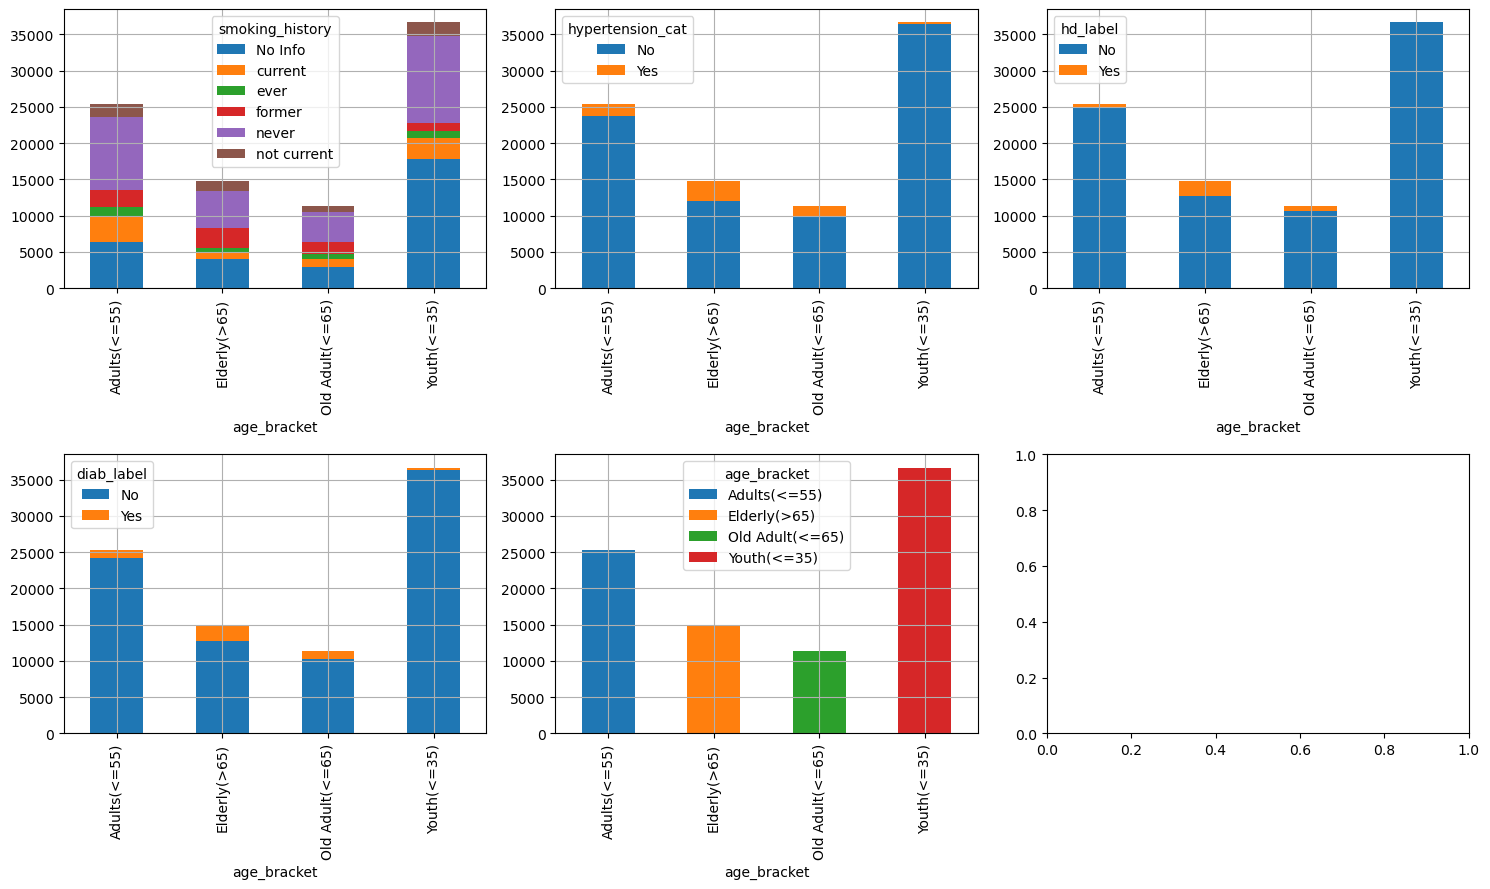

In [66]:
###Data Analysis with Stacked barplot
fig, position = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
position = position.flatten()

for index, column_name in enumerate(cat_column):
    pd.crosstab(df["age_bracket"], df[column_name]).plot(kind="bar", stacked=True, ax=position[index])
    position[index].grid(True)
    
plt.tight_layout()
plt.show()

- Top1:shows Gender distribution across age. the youth have similar average numbers of female and male. 
    the adult,elderly and old adult have more Female than male.
- Top2: smoking history across the age brackets.Youth have more of the smoking history(no info(this could indicate missing data though or undisclosed smoking history))
    smoking history(never) is more prevalence in the youth, more like there is an awareness about the risk of smoking. Even if adults doesnt have more numbers, they have the highest percent of current and ever smokers.
- Top3: Majority do not have hypertension, but there is a trend of the higher the age, the higher the risk of hypertension.

- Below1: Across the age groups, there is majorly no heart disease, except that the older they get the higher they are at risk to haert disease.
    the older group have high percent of heart disease that the adults and old adults. Heart disease is rare to find in young age group.
- Below2:The proportion of diabetes increase with age, Youth group, have very low diabetes cases, while the elderly group have higher diabetes cases.
- Below3: Old adults and elderly have the lowest poulation. They should be considered for preventive health care strategies.

### Multivariate Analysis

In [67]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes', 'hypertension_cat',
       'hd_label', 'diab_label', 'age_bracket'],
      dtype='object')

<AxesSubplot:xlabel='age_bracket', ylabel='blood_glucose_level'>

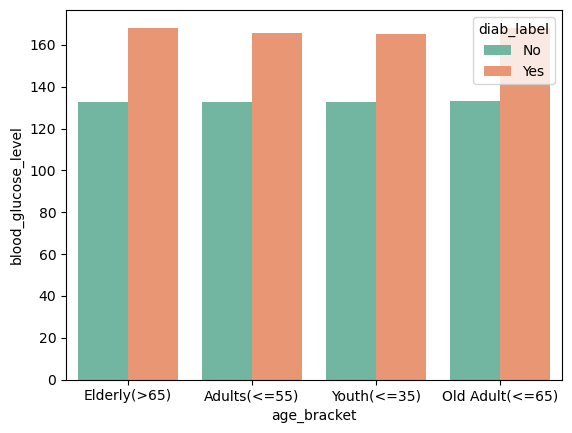

In [68]:
sns.barplot(x=df["age_bracket"], y=df["blood_glucose_level"], hue=df["diab_label"], palette="Set2", ci=None)

- The difference between diabetic and non-diabetic across all age bracket is consistent.
- non-diabetic persons have a stable blood glucose level across all ages
- Diabetic persons have higher blood glucose level, around >=163

<AxesSubplot:xlabel='age_bracket', ylabel='bmi'>

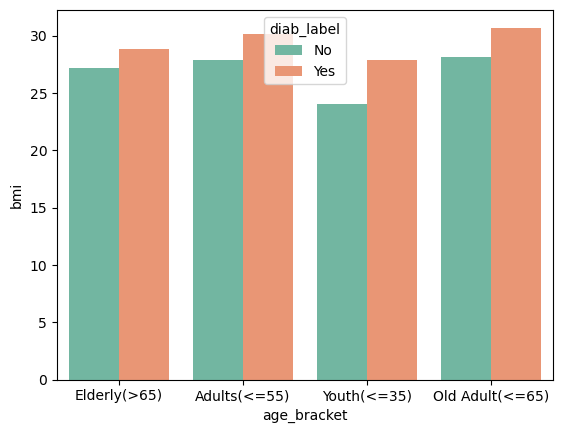

In [69]:
sns.barplot(x=df["age_bracket"], y=df["bmi"], hue=df["diab_label"], palette="Set2", ci=None)

- Diabetic persons have higher proportion across all age bracket. High BMI 0f >25 is an overweight and obesity, and is at risk of diabetes.
- Youth age bracket, have more of healthy weight persons with no diabetes. 
- Highest BMI, almost 30 is seen in the old adult(<=65), meaning they are obese and are at risk of diabetes.
- Adult, Old adult and elderly age brackets, have high BMI for those who are not diabetic, they could be overweighted, which could be caused by not involving the body in physical activities.

### Correlation Analysis

In [70]:
correlation_map = df.select_dtypes(include=['number']).corr()

In [71]:
correlation_map

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.255814,0.234111,0.405587,0.055825,0.049341,0.215788
hypertension,0.255814,1.000000,0.122310,0.135543,0.042954,0.039065,0.161824
heart_disease,0.234111,0.122310,1.000000,0.069217,0.036595,0.028797,0.145767
bmi,0.405587,0.135543,0.069217,1.000000,0.038048,0.034035,0.146639
HbA1c_level,0.055825,0.042954,0.036595,0.038048,1.000000,0.057663,0.264270
blood_glucose_level,0.049341,0.039065,0.028797,0.034035,0.057663,1.000000,0.218842
diabetes,0.215788,0.161824,0.145767,0.146639,0.264270,0.218842,1.000000


<AxesSubplot:>

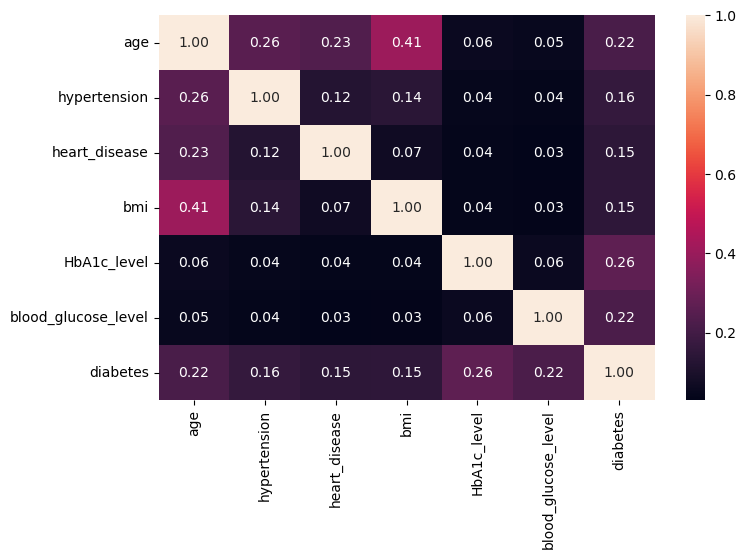

In [72]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_map, annot=True, fmt =".2f")

- Age and BMI (0.41)- show a moderate positive correlation but not a strong relationship. From the visualizations above, older persons are likely to have high BMI.
- Age and hypertension(0.26), alos a positive correlation but not a stong relationship.
- Age and diabetes(0.22), positie correlation but no string relationship. The older they are, the higher the risk of diabetes.
- HbA1c level and Diabetes - weak positve correlation but no string relationship. The average level of blood sugar can be connected to diabetes. 

<AxesSubplot:xlabel='diabetes', ylabel='count'>

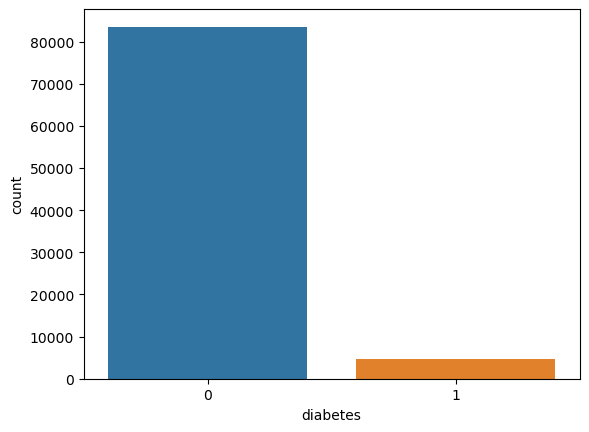

In [73]:
#Target Distribution
sns.countplot(x=df["diabetes"])

- the distribution shows, the dataset is imbalanced, that is, it is about 90:10 ratio.

In [74]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes', 'hypertension_cat',
       'hd_label', 'diab_label', 'age_bracket'],
      dtype='object')

In [103]:
#create a copy of the data (Exclude target/label alongside other columns that was created)
x = df[['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level']]

In [104]:
#Seperate the features from the target
y = df["diabetes"]

In [105]:
x.head(2)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,80,0,1,never,25.19,6.6,140
1,54,0,0,No Info,27.32,6.6,80


In [106]:
#confirm the datatypes
x.dtypes

age                      int32
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
dtype: object

## categorical Encoding
### Using label encoder

In [79]:
from sklearn.preprocessing import LabelEncoder

In [107]:
cat_data = x.select_dtypes(include="object")
cat_col = cat_data.columns

In [108]:
cat_col

Index(['smoking_history'], dtype='object')

In [109]:
x["smoking_history"].value_counts()

never          31249
No Info        31077
current         8349
former          8133
not current     5764
ever            3589
Name: smoking_history, dtype: int64

In [110]:
#initialize
encoder = LabelEncoder()

In [111]:
x["smoking_history"] = encoder.fit_transform(x["smoking_history"])

In [112]:
x.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,80,0,1,4,25.19,6.6,140
1,54,0,0,0,27.32,6.6,80
2,28,0,0,4,27.32,5.7,158
3,36,0,0,1,23.45,5.0,155
4,76,1,1,1,20.14,4.8,155


## Data Scaling

In [113]:
len(df.select_dtypes(include="number").columns)

7

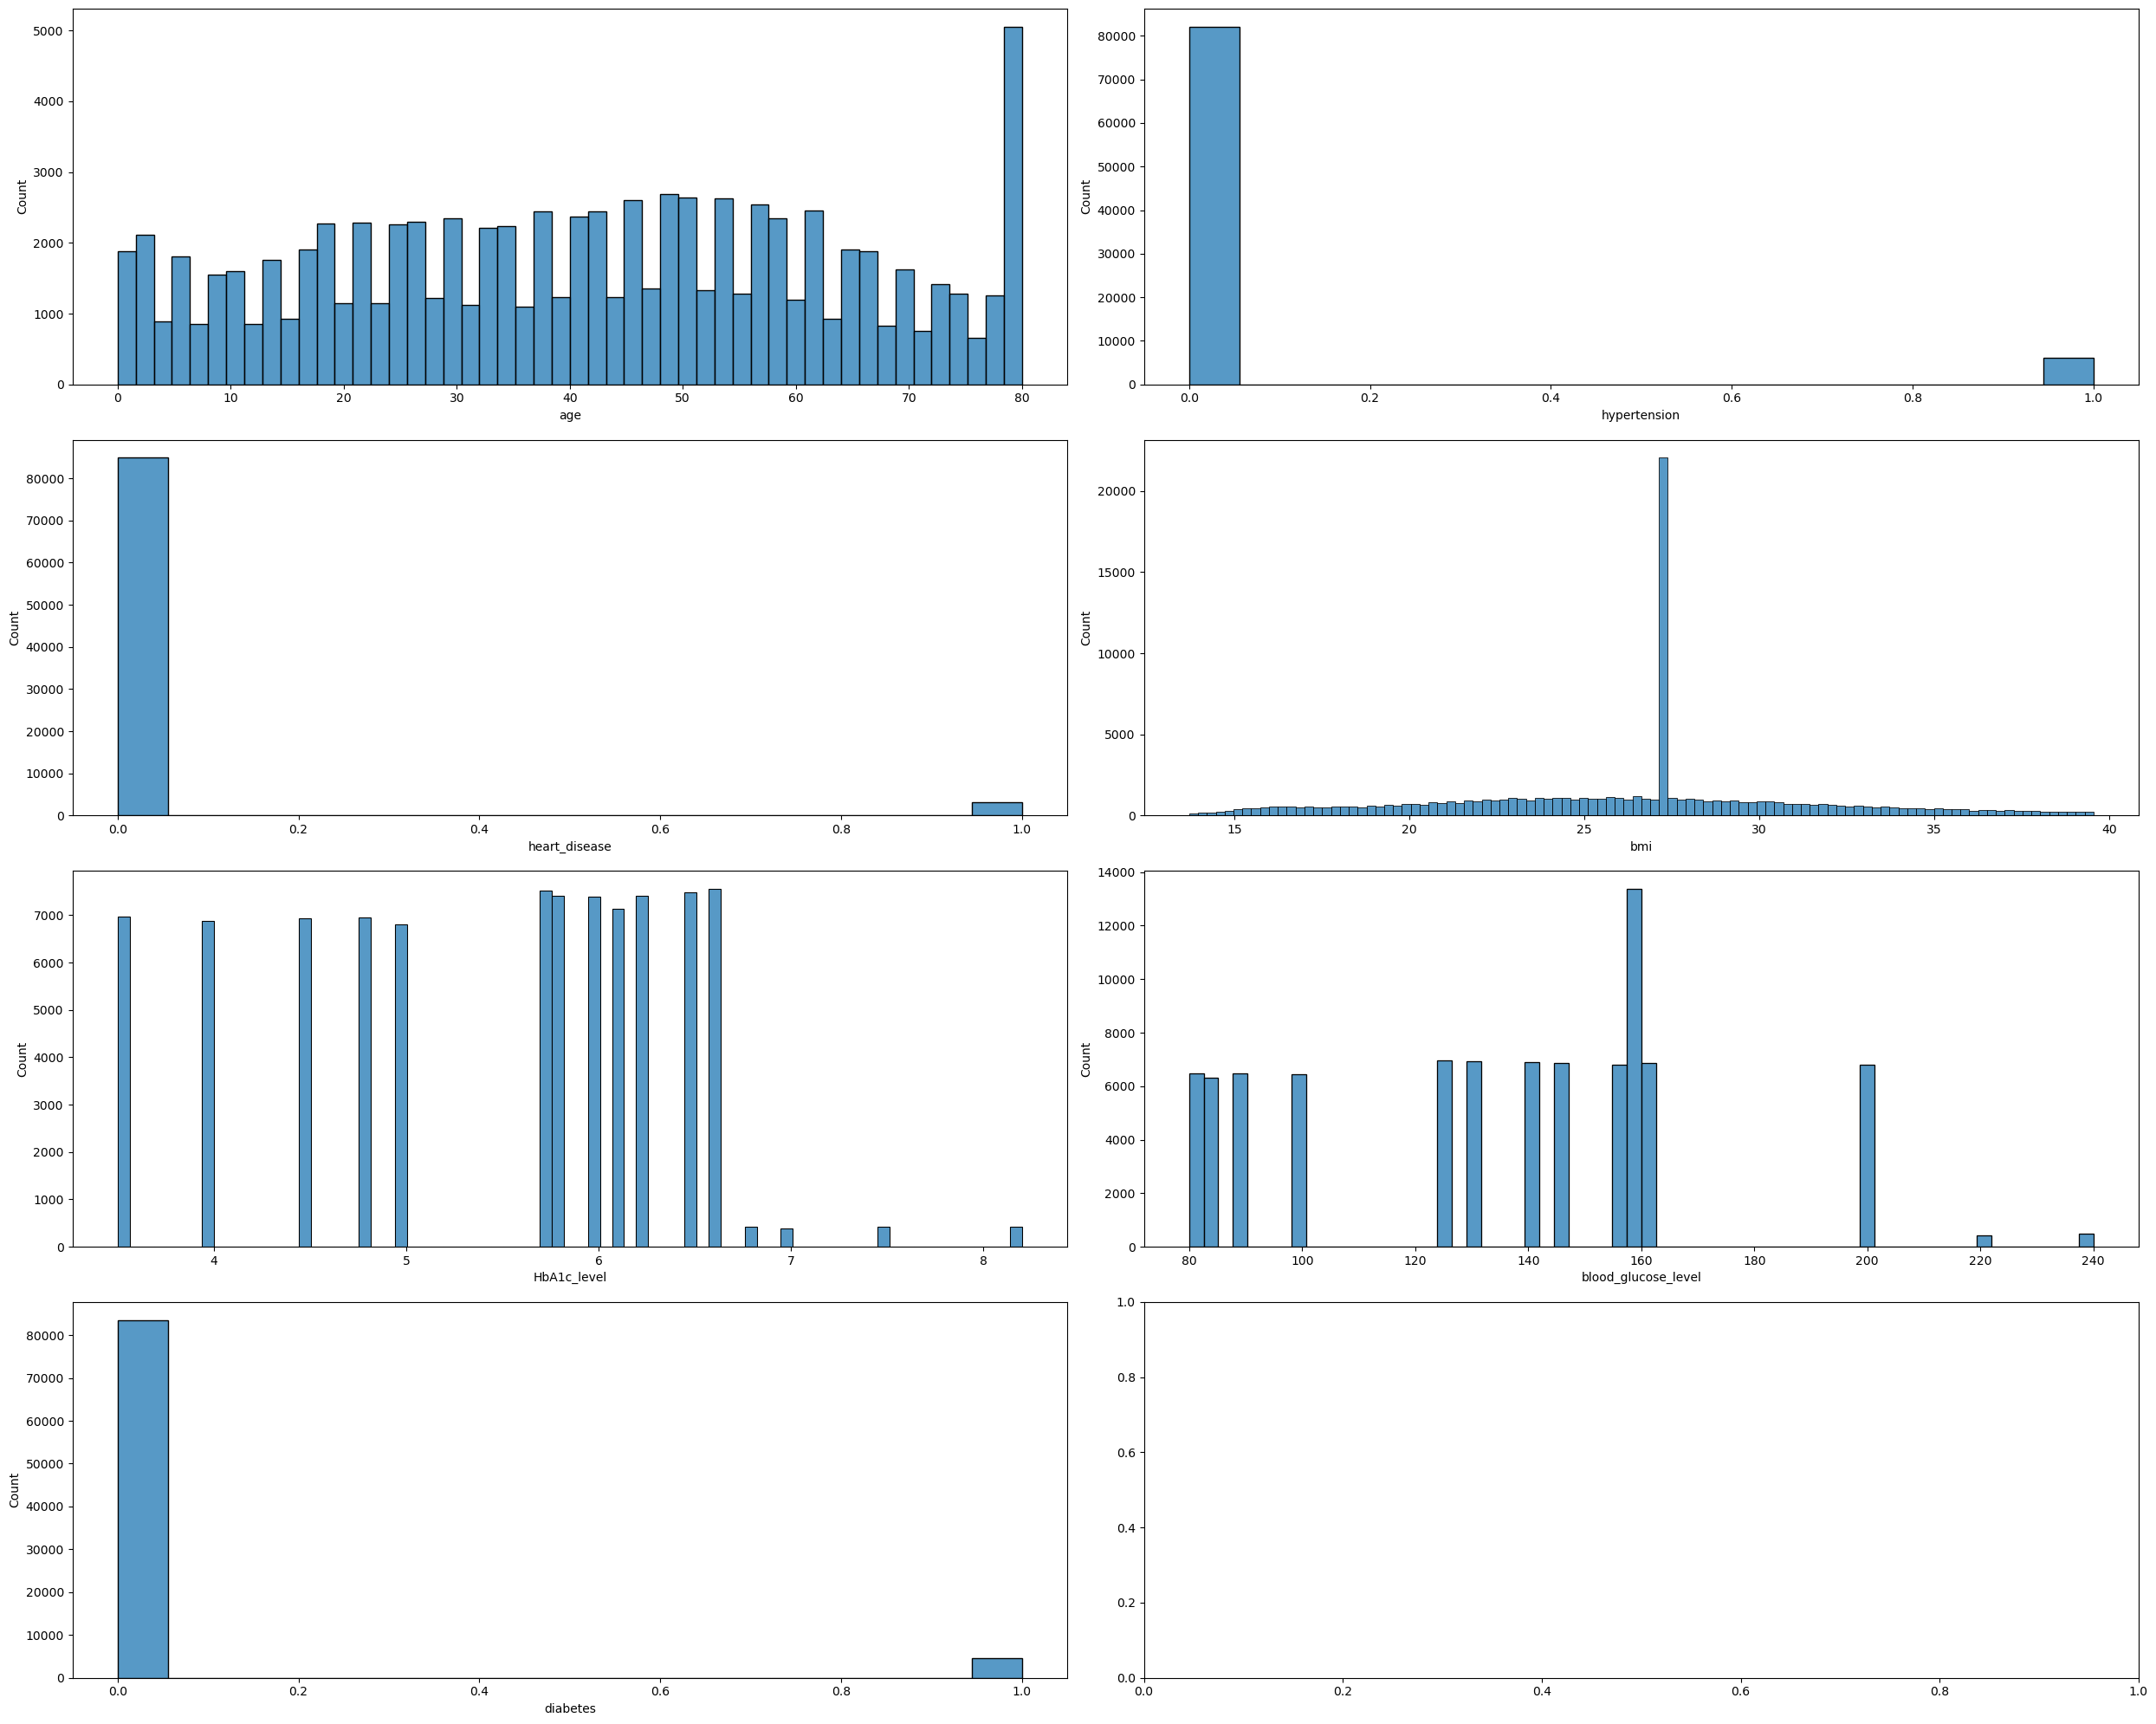

In [88]:
###Data Analysis to check the distribution of the features
fig, position = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
position = position.flatten()

for index, column_name in enumerate(df.select_dtypes(include="number")):
    sns.histplot(df[column_name], ax=position[index])
                                    
plt.tight_layout()
plt.show()

In [101]:
#Initialize the scaler
scaler = StandardScaler()

# Model selection, training, validation and Evaluation

In [114]:
#Split data into trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [115]:
X_train.head(3)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
97849,19,0,0,4,22.58,5.8,90
22115,50,0,0,0,30.24,4.8,159
56919,0,0,0,0,16.31,6.0,85


In [132]:
y_train.value_counts()

0    66839
1     3689
Name: diabetes, dtype: int64

In [118]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [119]:
X_test_scaled

array([[-0.66238619, -0.26695256, -0.1953236 , ..., -1.25164261,
         1.04410531,  0.16060017],
       [ 1.18792985, -0.26695256, -0.1953236 , ...,  0.43165275,
        -1.47037307,  1.85411227],
       [ 0.43899241, -0.26695256, -0.1953236 , ...,  0.19690748,
         1.14468445,  0.7251042 ],
       ...,
       [ 0.92359899,  3.74598393, -0.1953236 , ..., -0.59321075,
         1.04410531, -1.39178593],
       [-0.04561418, -0.26695256, -0.1953236 , ..., -0.61802123,
         0.64178877,  1.85411227],
       [-1.41132364, -0.26695256, -0.1953236 , ..., -2.03221835,
         1.04410531, -1.39178593]])

In [120]:
y_test.value_counts()

0    16704
1      929
Name: diabetes, dtype: int64

### Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     16704
           1       0.77      0.41      0.54       929

    accuracy                           0.96     17633
   macro avg       0.87      0.70      0.76     17633
weighted avg       0.96      0.96      0.96     17633

AUC-ROC: 0.7017366459732997


<AxesSubplot:title={'center':'Confusion matrix_LR'}>

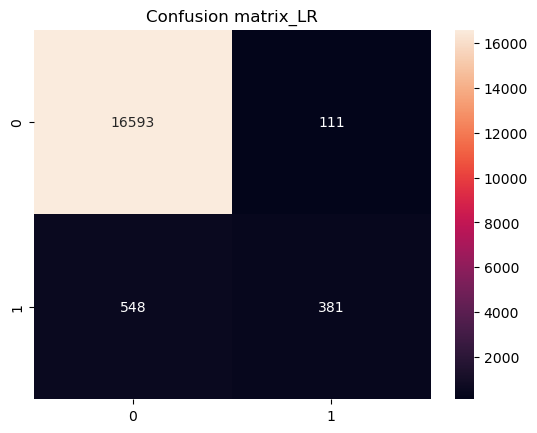

In [121]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)
ly_prediction = logreg_model.predict(X_test_scaled)
lr_report = classification_report(y_test, ly_prediction, digits=2)
c_matrix_l = confusion_matrix(y_test, ly_prediction)
print(lr_report)
print("AUC-ROC:", roc_auc_score(y_test,ly_prediction))
plt.title("Confusion matrix_LR")
sns.heatmap(c_matrix_l, annot=True, fmt="g")

- Class 0 (No Diabetes) with 16719 cases and class 1 (have diabetes) with 920 cases
- **Class 0** happens to be the majority class and the **precision** shows that the model predicts people with no diabetes and its 97% correct. the **Recall** show the model identifies non diabetic persons 99% correctly. **F1 score** shows a very good balance of 98%, between precision and recall. 
- **Class 1; precision** shows that the model predicts people with diabetes and its 77% correct, this is good and surprising given the dataset is not balanced and it still was able to identify persons with diabetes correctly. the **Recall** shows the model identifies diabetic persons 41% correctly, which means it has a high false negative rate of wrongly identified non-diabetic persons as diabetic persons. **F1 score** shows a low score of 54% due to the poor recall and indicating the model is struggling to detect diabetic cases.
- 
- The model overall performance shows an **accuracy** of 96%, of predicting correctly.
- the **weighted average** shows that the model is skewed towards class 0, as it has higher support in making the model appear better than it actually is for class 1 detection.
- **AUC-ROC** score is 70%, which suggests the model is moderate better than random guessing but not very effective in differentiating both classes.
- 
- **confusion matrix** explains, (True Negative),that is, The model correctly predicted no diabetes(class 0) 16593 cases out of 16719.
- (False positive), that is, the model incorrectly predicted diabetes for non diabetic persons, 111 cases.
- (False Negative), the model incorrectly predicted no diabetes for actual diabetic persons, 548 cases of 920.
- (True Positive), Model correctly predicted 381 cases to be diabetes for actual diabetic persons.


### Random Forest

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16704
           1       0.86      0.50      0.64       929

    accuracy                           0.97     17633
   macro avg       0.92      0.75      0.81     17633
weighted avg       0.97      0.97      0.97     17633

AUC-ROC: 0.750176987831434


<AxesSubplot:title={'center':'Confusion matrix_RF'}>

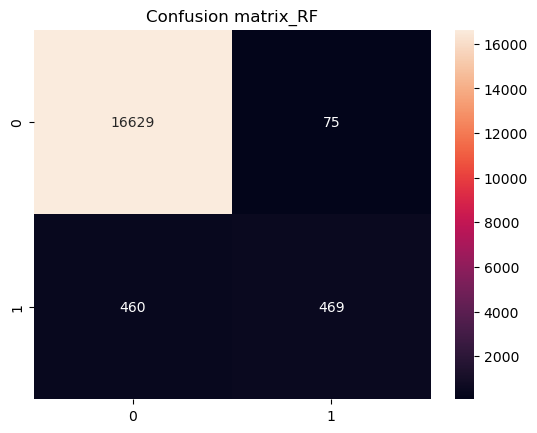

In [122]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_prediction = rf_model.predict(X_test_scaled)
rf_report = classification_report(y_test, rf_prediction, digits=2)
c_matrix_rf = confusion_matrix(y_test, rf_prediction)
print(rf_report)
print("AUC-ROC:", roc_auc_score(y_test,rf_prediction))
plt.title("Confusion matrix_RF")
sns.heatmap(c_matrix_rf, annot=True, fmt="g")

- **Class 0**; the **precision** shows that the model predicts people with no diabetes and its 97% correct. the **Recall** show the model identifies all actual non diabetic cases 100% correctly. **F1 score** shows a strong balance of 98%, between precision and recall. 
- **Class 1; precision** shows that the model predicts people with diabetes and its 86% correct with few false positives. the **Recall** shows the model captures actual diabetic persons 50% correctly, which means there is still half cases wrongly identified with non-diabetic persons as diabetic persons. **F1 score** shows a moderate score of 64% , which is better than the logistic regression model (54%).
- 
- The model overall performance shows a higher **accuracy** of 97%, of predicting correctly.
- the **weighted average**; though there is an improvement, still the model favours class 0.
- **AUC-ROC** score is 75%, the model is better at differentiating between both classes, than the logistic regression model.

- **confusion matrix**; the model correctly predicted 16629 cases,as actual non diabetic cases and 75 cases wrongly predicted as diabetic instead of non diabetic.
-  the model corrrectly predicted 469 cases as actual diabetes cases, and wrongly predicted 460 as non diabetes instead of diabetes.

### XGB Classifier

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16704
           1       0.92      0.36      0.52       929

    accuracy                           0.96     17633
   macro avg       0.94      0.68      0.75     17633
weighted avg       0.96      0.96      0.96     17633

AUC-ROC: 0.6799416239807975


<AxesSubplot:title={'center':'Confusion matrix_XGB'}>

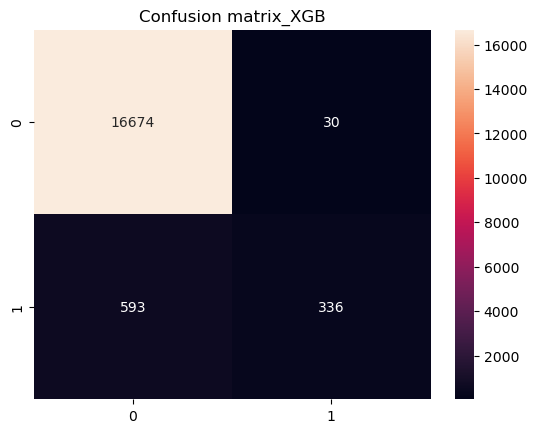

In [123]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_prediction = xgb_model.predict(X_test_scaled)
xgb_report = classification_report(y_test, xgb_prediction, digits=2)
c_matrix_xgb = confusion_matrix(y_test, xgb_prediction)
print(xgb_report)
print("AUC-ROC:", roc_auc_score(y_test,xgb_prediction))
plt.title("Confusion matrix_XGB")
sns.heatmap(c_matrix_xgb, annot=True, fmt="g")

- the precision, recall for class 0 is similar to the random forest model, and f1 score is 98%. All non diabetic cases are correctly satisfied.
- Class 1 has a good precison of 92% and a recall of 36%. The model correctly identifies diabetic cases, but still misses a little more than half actual diabetes cases. 
- The model overall performance shows a higher **accuracy** of 96%, of predicting correctly, but its influenced by class 0.
- **AUC-ROC** score is 68%

- **confusion matrix**; the model correctly predicted 16674 cases,as actual non diabetic cases and 30 cases wrongly predicted as diabetic instead of non diabetic.
-  the model corrrectly predicted 336 cases as actual diabetes cases, and wrongly predicted 593 as non diabetes instead of diabetes.
- There is an issue of High False negative - missed diabetes cases

### Naive Bayes (probabilistic, not randomness)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     16704
           1       0.26      0.42      0.32       929

    accuracy                           0.91     17633
   macro avg       0.61      0.68      0.63     17633
weighted avg       0.93      0.91      0.92     17633

AUC-ROC: 0.6768565646536258


<AxesSubplot:title={'center':'Confusion matrix_NaiveBayes'}>

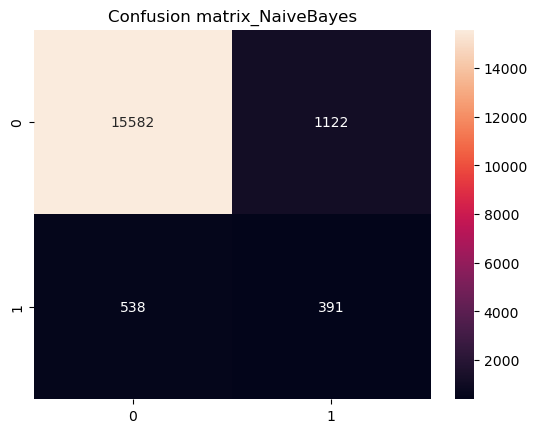

In [124]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_prediction = nb_model.predict(X_test_scaled)
nb_report = classification_report(y_test, nb_prediction, digits=2)
c_matrix_nb = confusion_matrix(y_test, nb_prediction)
print(nb_report)
print("AUC-ROC:", roc_auc_score(y_test,nb_prediction))
plt.title("Confusion matrix_NaiveBayes")
sns.heatmap(c_matrix_nb, annot=True, fmt="g")

- There is an overall accuracy of 91%. The Naive bayes model correctly classifies 91% of the cases.
- **precison** - the model predicts No diabetes correctly 97% of the time, for class 0, while it predicts Diabates correctly only 26% of the time, which indicates alot of false positive.
- **Recall** - 93% of actual non diabetic cases are correctly identified on class 0. while it captures 42% of actual diabetes cases , indicates false negatives.
- **F1score** - there is strong balnce between precision and recall in class 0 and the low balance in class 1, because of poor detection of diabetes cases.
- **AUC-ROC** score is 68% and has moderate distinguishing power over the diabetic and non diabetic cases.
- **confusion matrix** shows the model is good at detecting Non diabetic. It is poor at identifying diabetes cases and has many false positives, that is, misclassified 1122 cases as diabetics. It also have many false negatives, that is, misclassifying 538 actual diabetic cases as non diabetic cases.

- **Although Class 1 was underrepresented...**
- **Ransom Forest perfomed the best. It has the highest recall, overall accuracy, precision, F1 score and AUCROC score**

- The **RECALL** is a key metric. It measures how many actual diabetes or non diabetes cases are correctly detected. If the recall is high, it reduces the false negatives (the diabetes cases misclassified as non diabetes). It os important because diabetes is a serious health condition and not been able to detect diabetes in a diabetic or potentially diabetic person will cause severe health challenge. 

- **PRECISION** is also an important metric in thei problem. It measures how many diabetic cases are actually diabetic.  It becomes a challenge when a non diabetic person is classified as a diabetic person (False Positive), it leads to unneccessary medical prescription and advise.

- **AUC-ROC** score needs to be > 80% to be able to distinguish better between diabetes and non diabetes cases. It measures the ability to distinguish between both cases.

- The business should be more concerned with the **FALSE NEGATIVES**. This is a big problem because a patient with diabetes not classisfied as one, can miss all the care and interventions needed to manage their health and also manage their jobs, especially if the patients are drivers. It is an high risk. Apart from the delayed medication, the health worsen and can also lead to potential liability, seen as negligence on the hospital part. Prioritizing Recall  will reduce the false negatives and ensure fewer missed cases.

In [125]:
from collections import Counter
# Check class distribution before SMOTE
print(f"Before SMOTE: {Counter(y_train)}")

Before SMOTE: Counter({0: 66839, 1: 3689})


In [135]:
x_smo = MinMaxScaler().fit_transform(x)

In [136]:
x_smo

array([[1.        , 0.        , 1.        , ..., 0.44427245, 0.65957447,
        0.375     ],
       [0.675     , 0.        , 0.        , ..., 0.52670279, 0.65957447,
        0.        ],
       [0.35      , 0.        , 0.        , ..., 0.52670279, 0.46808511,
        0.4875    ],
       ...,
       [0.825     , 0.        , 0.        , ..., 0.54643963, 0.46808511,
        0.46875   ],
       [0.3       , 0.        , 0.        , ..., 0.84017028, 0.10638298,
        0.125     ],
       [0.7125    , 0.        , 0.        , ..., 0.3374613 , 0.65957447,
        0.0625    ]])

In [137]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x_smo, y)

Defaulting to user installation because normal site-packages is not writeable


              precision    recall  f1-score   support

           0       0.97      0.75      0.85     16704
           1       0.11      0.55      0.18       929

    accuracy                           0.74     17633
   macro avg       0.54      0.65      0.52     17633
weighted avg       0.92      0.74      0.81     17633

AUC-ROC: 0.6505069978017809


<AxesSubplot:title={'center':'Confusion matrix_RF_BAL'}>

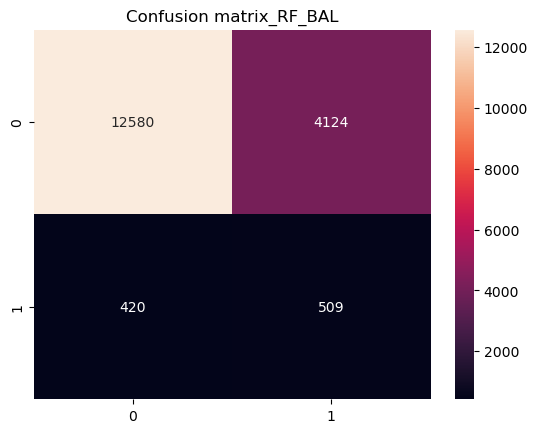

In [138]:
rf_model_bal = RandomForestClassifier(random_state=42)
rf_model_bal.fit(X_smote, y_smote)
rf_prediction_bal = rf_model_bal.predict(X_test_scaled)
rf_report_bal = classification_report(y_test, rf_prediction_bal, digits=2)
c_matrix_rf_bal = confusion_matrix(y_test, rf_prediction_bal)
print(rf_report_bal)
print("AUC-ROC:", roc_auc_score(y_test,rf_prediction_bal))
plt.title("Confusion matrix_RF_BAL")
sns.heatmap(c_matrix_rf_bal, annot=True, fmt="g")

In [139]:
y_smote.value_counts()

0    83543
1    83543
Name: diabetes, dtype: int64